In [2]:
import psycopg2
import pandas as pd

In [11]:
import seaborn as sns

In [36]:
import seaborn.regression as regression

In [3]:

class Postgresql(object):
    def __init__(self, host, port, user, password, database):
        try:
            self.conn = psycopg2.connect(host=host, port=port, user=user, password=password, database=database)
        except psycopg2.DatabaseError as e:
            print('连接postgresql失败', e)
        
    def selectSql(self, sql):
        with self.conn.cursor() as cursor:            
            try:
                cursor.execute(sql)
                result = cursor.fetchall()
                return result
            except psycopg2.Error as e:
                self.conn.rollback()
                print('select事务失败', e)
    def insertSql(self, sql):
        with self.conn.cursor() as cursor:
            try:
                cursor.execute(sql)
                self.conn.commit()
                self.conn.close()
            except psycopg2.Error as e:
                self.conn.rollback()
                print("insert 事务失败", e)
                
    def updateSql(self, sql):
        with self.conn.cursor() as cursor:
            try:
                cursor.execute(sql)
                self.conn.commit()
                self.conn.close()
            except psycopg2.Error as e:
                self.conn.rollback()
                print("insert 事务失败", e)
    def delSql(self, sql):
        with self.conn.cursor() as cursor:
            try:
                cursor.execute(sql)
                self.conn.commit()
                self.conn.close()
            except psycopg2.Error as e:
                self.conn.rollback()
                print("insert 事务失败", e)

In [4]:
ps = Postgresql('localhost', '5432', 'postgres', 'postgres','zhoutao') 
result = ps.selectSql("select * from stocks_a where code='600117'")
result = pd.DataFrame(result)
result.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,600117,西宁特钢,4.80,0.44,10.09,260050.0,119238318.0,12.16,4.80,4.27,...,3.51,111.50,1.59,5.016568e+09,3.557853e+09,-0.1351,-0.1710,0.00,1997-10-15,2018-06-14 15:00:00
1,600117,西宁特钢,4.88,0.08,1.67,479815.0,237050725.0,11.46,5.26,4.71,...,6.47,113.35,1.62,5.100177e+09,3.617150e+09,-0.0597,-0.1572,0.41,1997-10-15,2018-06-15 15:00:00
2,600117,西宁特钢,4.55,-0.33,-6.76,278126.0,126633767.0,8.40,4.80,4.39,...,3.75,105.69,1.51,4.755288e+09,3.372548e+09,-0.1333,-0.2142,1.79,1997-10-15,2018-06-19 15:00:00
3,600117,西宁特钢,5.01,0.46,10.11,375205.0,182824251.0,10.11,5.01,4.55,...,5.06,116.37,1.66,5.236043e+09,3.713509e+09,-0.0328,-0.1347,0.00,1997-10-15,2018-06-20 15:00:00
4,600117,西宁特钢,5.51,0.50,9.98,829976.0,446551568.0,6.99,5.51,5.16,...,11.20,127.99,1.83,5.758602e+09,4.084118e+09,0.1824,-0.0484,0.00,1997-10-15,2018-06-21 15:00:00


In [29]:
## 获得西宁特钢的收盘价
close_price = result.iloc[:, 2]
close_price.index = result.iloc[:, 23]
close_price.index.names = ['time']
close_price.name = '600117_close_price'

# 时间序列

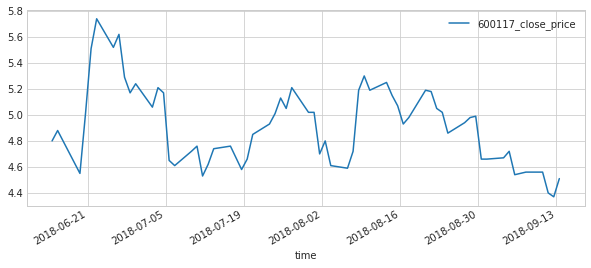

In [30]:
sns.set_style('whitegrid')
close_price.plot(legend=True, figsize=(10, 4))

# 核密度估计

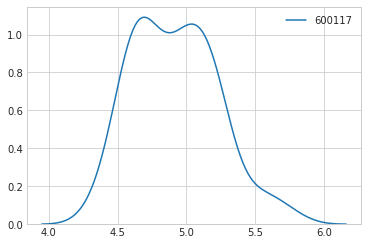

In [23]:
sns.kdeplot(close_price.dropna())

# 核密度估计 + 直方图

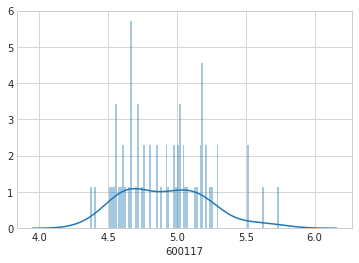

In [25]:
sns.distplot(close_price.dropna(), bins=100)

# 两条序列的person相关系数

In [28]:
## 获得西宁特钢的开盘价
open_price = result.iloc[:, 10]
open_price.index = result.iloc[:, 23]
open_price.index.names = ['time']
open_price.name = '600117_open_price'

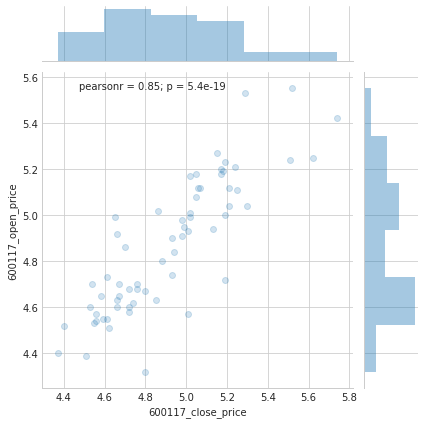

In [31]:
sns.jointplot(close_price, open_price, alpha=0.2)

In [ ]:
# 多个条序列的persion相关系数